## XRR of supported lipid membrane at the water/Si interface

Let's consider an XRR dataset of a DPPC supported bilayer at the water/Si interface. We will build a model for the membrane and check the effect of the membrane thickness on calculated reflectivity.

We model the interface as H2O / outer lipid heads/ tails/ inner lipid heads/ thin water layer/ SiO2 / Si.

In [1]:
from anaklasis import ref

project='none' # with this project name no file output will be performed

# Create model list
model=[
	#  Re_sld  Im_sld   thk rough solv description
	[ 9.41e-6, 0.00e-6,  0 , 2.0, 1.0, 'H2O'],
	[ 14.4e-6, 0.00e-6, 10,  2.0, 0.4, 'outer_heads'],
	[ 8.40e-6, 0.00e-6, 30 , 2.0, 0.0, 'tails'],
	[ 14.4e-6, 0.00e-6, 10,  2.0, 0.3, 'inner_heads'],
	[ 9.41e-6, 0.00e-6,  5 , 2.0, 1.0, 'thin_H2O_layer'],
	[ 19.5e-6, 0.00e-6, 10 , 2.0, 0.0, 'SiO2'],
	[ 18.5e-6, 0.00e-6,  0 , 0.0, 0.0, 'Si'],
	]

# We have a single patch(model) with full coverage
patches=[1.0]
system=[model]

global_param = [] # no parameters to define

resolution=[0.001]
background = [1.0e-9]
scale = [1.0]
qmax = [0.7]

We call _ref.calculate_ without plotting and store results in the _res1_ _dictionary_.

In [2]:
res1 = ref.calculate(project, resolution, 
	patches, system, global_param, 
	background, scale, qmax, plot=False)

--------------------------------------------------------------------
Program ANAKLASIS - Calculation Module for X-ray/Neutron reflection 
version 1.3, June 2021
developed by Dr. Alexandros Koutsioumpas. JCNS @ MLZ
for bugs and requests contact: a.koutsioumpas[at]fz-juelich.de
--------------------------------------------------------------------


Instrumental Resolution, dQ/Q: 0.001
--------------------------------------------------------------------
H2O real sld (10^-6 A^-2)      = 9.41 
H2O imaginary sld (10^-6 A^-2) = 0.00 
H2O thickness (A)              = 0.00 
H2O/outer_heads roughness (A) = 2.00 
H2O solvent volume fraction    = 1.00 
--------------------------------------------------------------------
outer_heads real sld (10^-6 A^-2)      = 14.40 
outer_heads imaginary sld (10^-6 A^-2) = 0.00 
outer_heads thickness (A)              = 10.00 
outer_heads/tails roughness (A) = 2.00 
outer_heads solvent volume fraction    = 0.40 
-----------------------------------------------------

we perform the calculation again for a thinner membrane (tail thickness 5 Angstrom less)

In [3]:
model=[
	#  Re_sld  Im_sld   thk rough solv description
	[ 9.41e-6, 0.00e-6,  0 , 2.0, 1.0, 'H2O'],
	[ 14.4e-6, 0.00e-6, 10,  2.0, 0.4, 'outer_heads'],
	[ 8.40e-6, 0.00e-6, 25 , 2.0, 0.0, 'tails'],
	[ 14.4e-6, 0.00e-6, 10,  2.0, 0.3, 'inner_heads'],
	[ 9.41e-6, 0.00e-6,  5 , 2.0, 1.0, 'thin_H2O_layer'],
	[ 19.5e-6, 0.00e-6, 10 , 2.0, 0.0, 'SiO2'],
	[ 18.5e-6, 0.00e-6,  0 , 0.0, 0.0, 'Si'],
	]

system=[model]

We call _ref.calculate_ again without plotting and store results in the _res2_ _dictionary_.

In [4]:
res2 = ref.calculate(project, resolution, 
	patches, system, global_param, 
	background, scale, qmax, plot=False)

--------------------------------------------------------------------
Program ANAKLASIS - Calculation Module for X-ray/Neutron reflection 
version 1.3, June 2021
developed by Dr. Alexandros Koutsioumpas. JCNS @ MLZ
for bugs and requests contact: a.koutsioumpas[at]fz-juelich.de
--------------------------------------------------------------------


Instrumental Resolution, dQ/Q: 0.001
--------------------------------------------------------------------
H2O real sld (10^-6 A^-2)      = 9.41 
H2O imaginary sld (10^-6 A^-2) = 0.00 
H2O thickness (A)              = 0.00 
H2O/outer_heads roughness (A) = 2.00 
H2O solvent volume fraction    = 1.00 
--------------------------------------------------------------------
outer_heads real sld (10^-6 A^-2)      = 14.40 
outer_heads imaginary sld (10^-6 A^-2) = 0.00 
outer_heads thickness (A)              = 10.00 
outer_heads/tails roughness (A) = 2.00 
outer_heads solvent volume fraction    = 0.40 
-----------------------------------------------------

we then plot the calculated reflectivity curves stored in the _res_ _dictionaries_ using the appropriate 'key'.

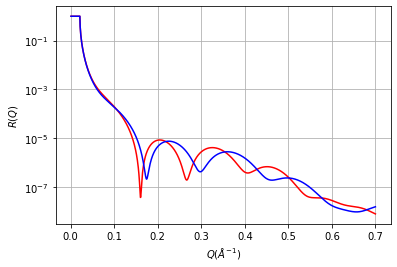

In [5]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(res1[("reflectivity")][:,0],res1[("reflectivity")][:,1],color='red')
plt.plot(res2[("reflectivity")][:,0],res2[("reflectivity")][:,1],color='blue')
plt.yscale('log')
plt.xlabel(r'$Q(\AA^{-1})$')
plt.ylabel(r'$R(Q)$')
plt.grid(True)
plt.draw()

we may also plot the sld profiles of the two membrane models.

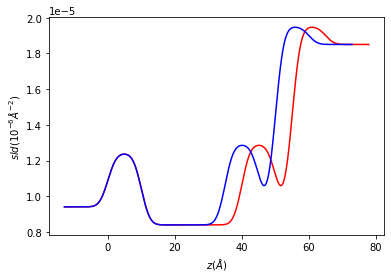

In [6]:
plt.figure()
plt.plot(res1[("profile")][:,0],res1[("profile")][:,1],color='red')
plt.plot(res2[("profile")][:,0],res2[("profile")][:,1],color='blue')
plt.xlabel(r'$z(\AA)$')
plt.ylabel(r'$sld(10^{-6}\AA^{-2})$')
plt.draw()